In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

### Loading Database

In [16]:
titanic = pd.read_csv("O:\\Mini Project Dataset\\Titanic\\titanic_train.csv", index_col = 0)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### EDA

In [17]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [19]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

### Checking null values in each column

In [20]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [21]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Checking for duplicate values

In [22]:
titanic.duplicated().sum()

0

In [23]:
t_copy = titanic.copy()

### Dropping Name, Cabin and Ticket Columns

In [24]:
t_copy = t_copy.drop(['Name', 'Cabin'], axis = 1)

In [25]:
t_copy = t_copy.drop('Ticket', axis = 1)

In [26]:
t_copy

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [27]:
t_copy.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [28]:
t_copy['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Checking Outliers in Age Column

<Axes: ylabel='Age'>

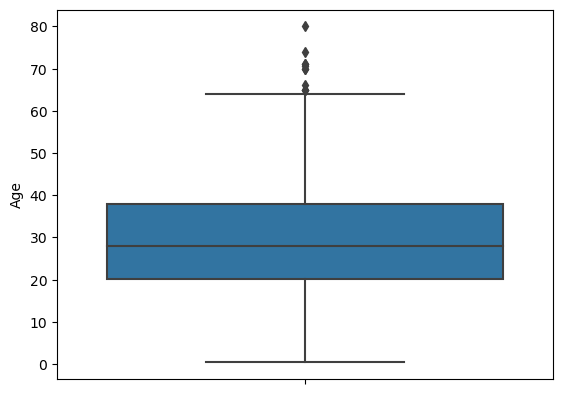

In [29]:
sns.boxplot(data = t_copy, y = 'Age')

### Filling Null Values of Age Column


In [30]:
t_copy['Age'] = t_copy['Age'].fillna(t_copy['Age'].median())

### Filling Null Values of Embarked Column

In [31]:
t_copy['Embarked'] = t_copy['Embarked'].fillna('S')

In [32]:
t_copy.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Univariate Analysis

### Histogram for Age Column


<Axes: xlabel='Age', ylabel='Count'>

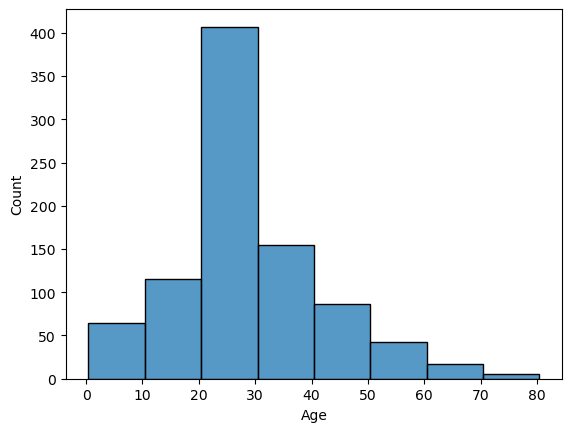

In [33]:
sns.histplot(data = t_copy, x = 'Age', binwidth = 10)

### Function for Univariate countplot

In [34]:
def countplot(col_name):
    plt.figure(figsize=(8,6))
    sns.countplot(data = t_copy, x = col_name)
    plt.show()

### Countplot for Sex Column

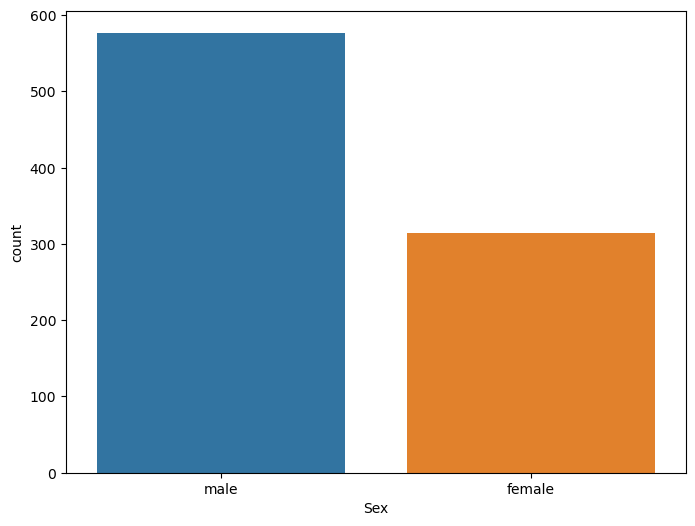

In [35]:
countplot(t_copy['Sex'])

#### Inference: There are more Male population than Female

### Countplot for Embarked Column

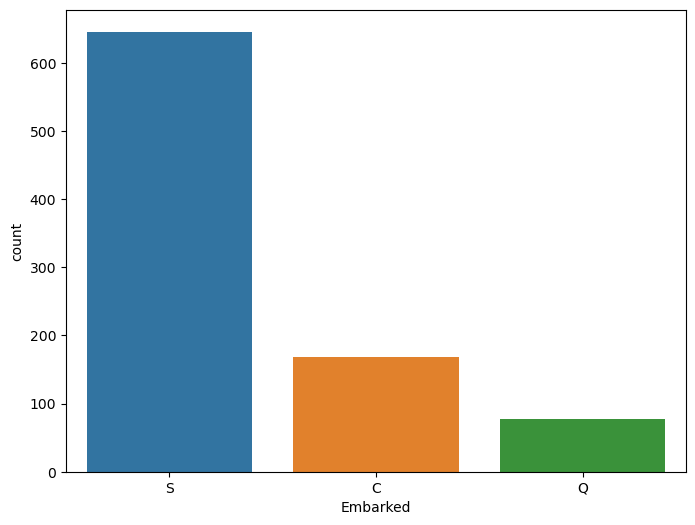

In [36]:
countplot(t_copy['Embarked'])

#### Inference: Most no. of people are from Southampton

### Countplot for Survived Column

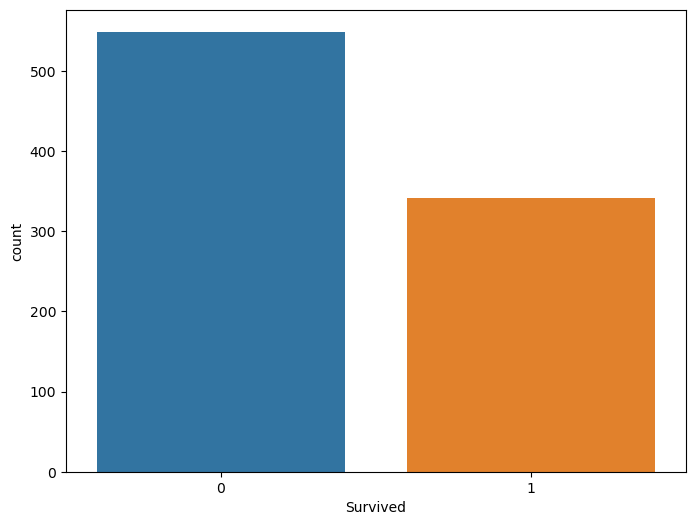

In [37]:
countplot(t_copy['Survived'])

### Countplot for Pclass(Ticket_class)Column

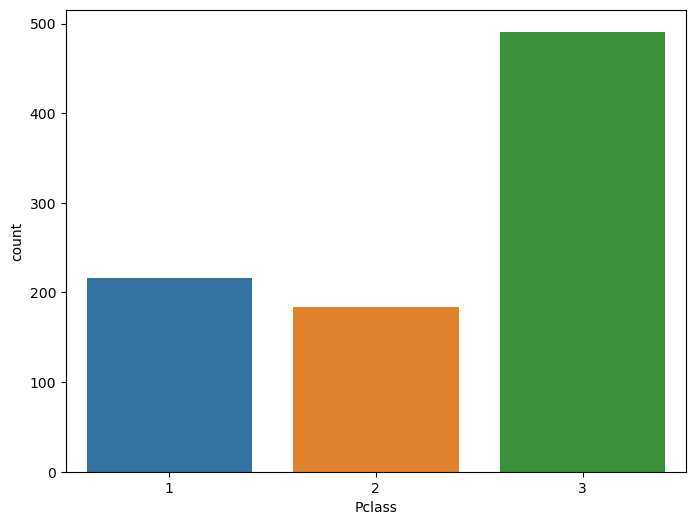

In [38]:
countplot(t_copy['Pclass'])

#### Population of Class-3 passengers is more than class-2 and class-1

### Saving Updated CSV 

In [39]:
t_copy.to_csv('O:\\Mini Project Titanic data\\titanic_eda.csv')

## Bivariate Analysis

### Survivor by Sex

<Axes: xlabel='Sex', ylabel='count'>

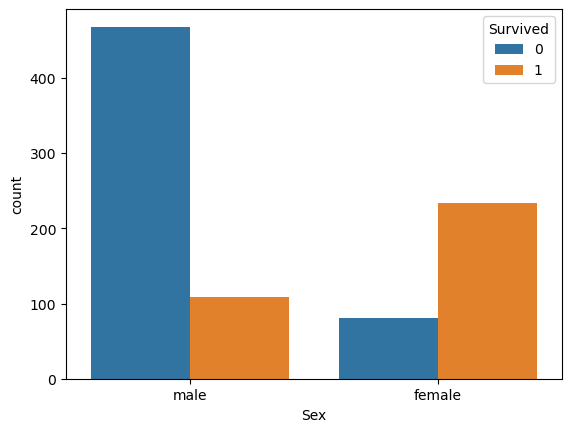

In [40]:
sns.countplot(x=t_copy['Sex'], hue=t_copy['Survived'])

### Survivor in each class

<Axes: xlabel='Pclass', ylabel='count'>

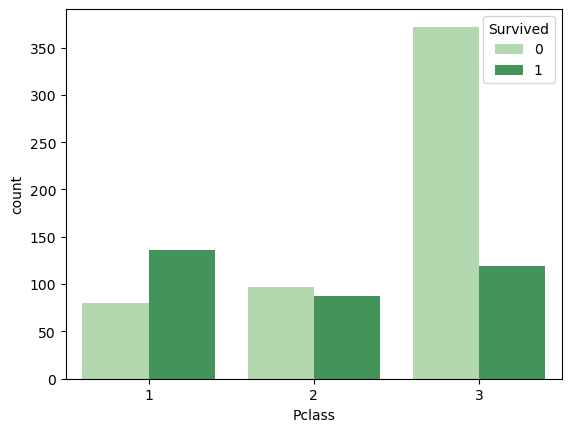

In [41]:
sns.countplot(x=t_copy['Pclass'], hue=t_copy['Survived'], palette='Greens')

### Survivor by Embarked

<Axes: xlabel='Embarked', ylabel='count'>

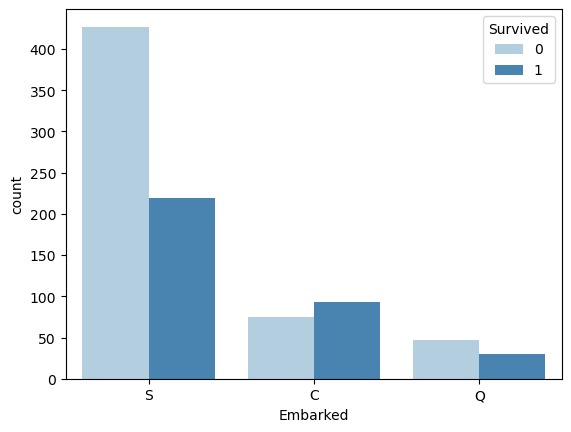

In [42]:
sns.countplot(x=t_copy['Embarked'], hue=t_copy['Survived'], palette='Blues')

### Survivor by Age

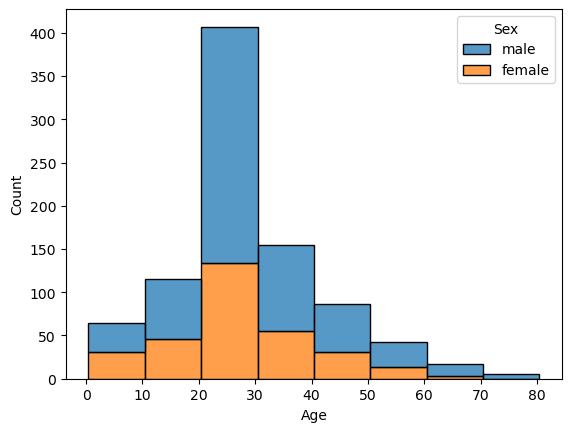

In [43]:
sns.histplot(x=t_copy['Age'], hue=t_copy['Sex'], multiple='stack', binwidth = 10)
plt.show()

In [44]:
t_copy

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


### Performing Get dummies

In [45]:
dum_tCopy = pd.get_dummies(t_copy, drop_first = True)

In [46]:
dum_tCopy

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,True,False,True
2,1,1,38.0,1,0,71.2833,False,False,False
3,1,3,26.0,0,0,7.9250,False,False,True
4,1,1,35.0,1,0,53.1000,False,False,True
5,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,True,False,True
888,1,1,19.0,0,0,30.0000,False,False,True
889,0,3,28.0,1,2,23.4500,False,False,True


### Correlation Heatmap of Dataset

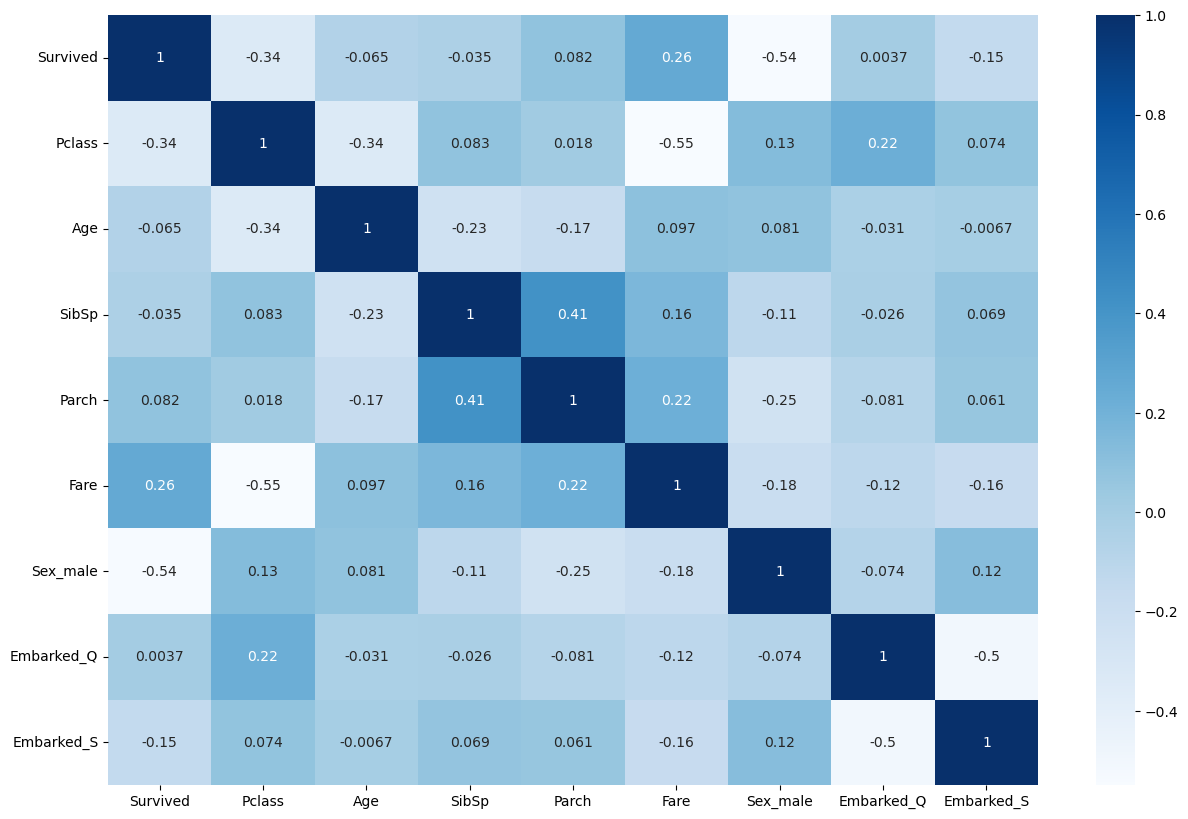

In [47]:
corr = dum_tCopy.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = "Blues")
plt.show()

### Implementing Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [49]:
Accuracy = {}

In [50]:
X = dum_tCopy.drop('Survived', axis = 1)
y = dum_tCopy['Survived']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y, random_state = 23)

In [52]:
lr = LogisticRegression()

In [53]:
lr.fit(x_train, y_train)

LogisticRegression()

In [54]:
y_pred = lr.predict(x_test)

In [55]:
print("Accuracy Score For Logistic Regression: ",accuracy_score(y_test, y_pred))

Accuracy Score For Logistic Regression:  0.7723880597014925


In [56]:
Accuracy['LR'] = accuracy_score(y_test, y_pred)

In [57]:
Accuracy

{'LR': 0.7723880597014925}

### Implementing KNN 

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, stratify = y, random_state = 23)

In [60]:
knn = KNeighborsClassifier(n_neighbors = 1)

#### Standard Scaler

In [61]:
std_scaler = StandardScaler()

In [62]:
pipe = Pipeline([('SCL', std_scaler), ('KNN', knn)])

In [63]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('SCL', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=1))])

In [64]:
y_pred = pipe.predict(x_test)

In [65]:
print("Accuracy Score:",accuracy_score(y_test, y_pred))

Accuracy Score: 0.7350746268656716


#### Min Max Scaler

In [66]:
mm_scaler = MinMaxScaler()

In [67]:
pipe = Pipeline([('SCL', mm_scaler), ('KNN', knn)])

In [68]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('SCL', MinMaxScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=1))])

In [69]:
y_pred = pipe.predict(x_test)

In [70]:
print("Accuracy Score: ",accuracy_score(y_test, y_pred))

Accuracy Score:  0.75


In [71]:
Accuracy['KNN'] = accuracy_score(y_test, y_pred)

### Implementing Naive-Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
nb = GaussianNB()

In [74]:
nb.fit(X_train, y_train)

GaussianNB()

In [75]:
y_pred = nb.predict(X_test)

In [76]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.7873134328358209


In [77]:
Accuracy['Naive_bayes'] = accuracy_score(y_test, y_pred)

### Implementing Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dtc = DecisionTreeClassifier(random_state = 23)

In [80]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

In [81]:
y_pred = dtc.predict(x_test)

In [82]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.7985074626865671


In [83]:
Accuracy['Decision_tree'] = accuracy_score(y_test, y_pred)

### Implementing SVM

In [84]:
from sklearn.svm import SVC

In [85]:
svm = SVC(kernel = 'linear', degree = 2)

In [86]:
svm.fit(x_train, y_train)

SVC(degree=2, kernel='linear')

In [87]:
y_pred = svm.predict(x_test)

In [88]:
print("Accuracy Score for SVM: ",accuracy_score(y_test, y_pred))

Accuracy Score for SVM:  0.7835820895522388


In [89]:
Accuracy['SVM'] = accuracy_score(y_test, y_pred)

### Implementing Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier(random_state=23)

In [92]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=23)

In [93]:
y_pred = rf.predict(X_test)

In [94]:
print("Accuracy Score for Random Forest: ", accuracy_score(y_test, y_pred))

Accuracy Score for Random Forest:  0.8134328358208955


In [95]:
Accuracy['Random_forest'] = accuracy_score(y_test, y_pred)

### Implementing Linear Discriminant Analysis

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [97]:
lda = LinearDiscriminantAnalysis()

In [98]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [99]:
y_pred = lda.predict(X_test)

In [100]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.7910447761194029


In [101]:
Accuracy['LDA'] = accuracy_score(y_test, y_pred)

### Implementing Boosting

In [102]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
base_classifier = DecisionTreeClassifier(max_depth=1)

#### Adaboost Classifier

In [104]:
ada = AdaBoostClassifier(base_classifier, n_estimators = 50, random_state = 23)

In [105]:
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=23)

In [106]:
y_pred = ada.predict(X_test)

In [107]:
print("Accuracy Score AdaBoost: ", accuracy_score(y_test, y_pred))

Accuracy Score AdaBoost:  0.8022388059701493


In [108]:
Accuracy['Boosting'] = accuracy_score(y_test, y_pred)

#### XGBoost

In [109]:
from xgboost import XGBClassifier


In [110]:
xgb = XGBClassifier(random_state = 23)

In [111]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=23, ...)

In [112]:
y_pred = xgb.predict(X_test)

In [113]:
print("Accuracy Score for XGBoost: ", accuracy_score(y_test, y_pred))

Accuracy Score for XGBoost:  0.8134328358208955


In [114]:
Accuracy

{'LR': 0.7723880597014925,
 'KNN': 0.75,
 'Naive_bayes': 0.7873134328358209,
 'Decision_tree': 0.7985074626865671,
 'SVM': 0.7835820895522388,
 'Random_forest': 0.8134328358208955,
 'LDA': 0.7910447761194029,
 'Boosting': 0.8022388059701493}

### Creating DataFrame for all accuracy scores

In [167]:
acc_df = pd.DataFrame(list(Accuracy.items()), columns = ['Model', 'Accuracy'])

In [168]:
acc_df

,Model,Accuracy
0,LR,0.772388
1,KNN,0.750000
2,Naive_bayes,0.787313
3,Decision_tree,0.798507
4,SVM,0.783582
5,Random_forest,0.813433
6,LDA,0.791045
7,Boosting,0.802239


In [170]:
# acc_df.style.highlight_max(color = 'Orange',axis=0)
acc_df.style.highlight_max(subset=['Accuracy'], color='Orange', axis=0)


,Model,Accuracy
0,LR,0.772388
1,KNN,0.750000
2,Naive_bayes,0.787313
3,Decision_tree,0.798507
4,SVM,0.783582
5,Random_forest,0.813433
6,LDA,0.791045
7,Boosting,0.802239


In [172]:
acc_df.sort_values(by = ['Accuracy'], inplace = True)

In [173]:
# acc_df.style.loc[acc_df['Accuracy'].idxmax(), 'background-color'] = 'red'
acc_df['Accuracy'].max()

0.8134328358208955

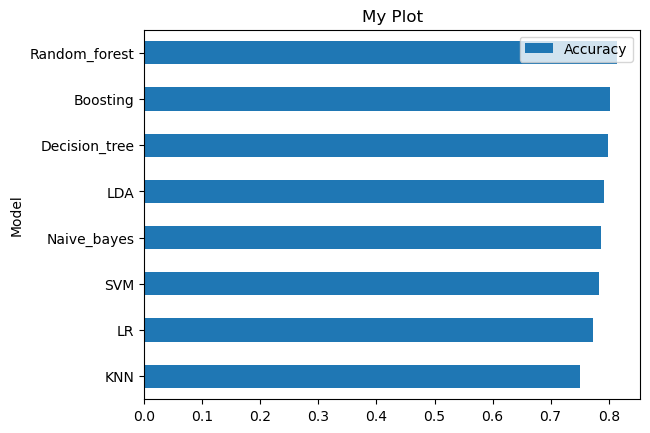

In [174]:
acc_df.plot(x='Model', y='Accuracy', kind='barh', title='My Plot')
plt.show()

### Tuning Random Forest Model

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
rf = RandomForestClassifier(random_state=23)

In [121]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 23)

In [122]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 23,
 'verbose': 0,
 'warm_start': False}

In [123]:
params = {
    'n_estimators': [5, 20, 50, 100],
    'max_depth': [2,3,4,5,10],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4,6] 
}

In [124]:
gcv = GridSearchCV(rf, param_grid = params, cv = kfold, scoring = 'accuracy', verbose = 2)

In [125]:
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samp

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=RandomForestClassifier(random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [1, 2, 5, 10],
                         'n_estimators': [5, 20, 50, 100]},
             scoring='accuracy', verbose=2)

In [127]:
print('Best Score: ', gcv.best_score_)

Best Score:  0.8154709677419356


### We got best accuracy score from Random Forest model: 0.8154709677419356 